## LEARNING MACHINE LEARNING 2018

# Lab 2: Intro to Scikit-Learn: Linear and KNN Regression

**Universidad del Rosario**<br>
**July 23, 2018**<br>
**Instructors: Pavlos Protopapas, Rafael Martinez, Juan Fernando Perez, Dora Suarez, Juan Felipe Giraldo, Dora Suarez, Julian Rincon, German Obando**

## Introduction to Scikit-learn

### Installation
Scikit-learn is included with the [Anaconda distribution of Pyhton](https://www.anaconda.com/download/). Current stable version is 0.19.2. 

You should therefore have it in  your systems. If you want to install it separetely in your own machine, you can find the installation and all other details in their [webpage](http://scikit-learn.org/stable/index.html). 

Scikit-learn requires:

* Python (>= 2.7 or >= 3.3),
* NumPy (>= 1.8.2),
* SciPy (>= 0.13.3).

Installation is easily performed with the `pip` or `conda` commands:

`pip install -U scikit-learn`

or

`conda install scikit-learn`


### Basic functionality

`Scikit-learn` is the main `python` machine learning library. It consists of many learners which can learn models from data, as well as a lot of utility functions such as `train_test_split`. It can be used in `python` by the incantation `import sklearn`.

The library has a very well-defined interface. This makes the library a joy to use, and surely contributes to its popularity.  The API consists of three interfaces:
1. estimator interface: builds and fits models
   * This interface is at the core of the library
   * Provides the `fit()` method
   * Unsupervised and supervised learning algorithms can be accessed from the estimator interface
2. predictor interface: makes predictions
3. transformer interface: converts data

You can refer to the original `scikit-learn` API paper for more details: [Buitinck, Lars, et al. "API design for machine learning software: experiences from the scikit-learn project." arXiv preprint arXiv:1309.0238 (2013).](https://arxiv.org/abs/1309.0238)

Let's see the structure of `scikit-learn` needed to make these fits. `.fit` always takes two arguments:
```python
  estimator.fit(Xtrain, ytrain)
```
We will consider two estimators in this lab: `LinearRegression` and `KNeighborsRegressor`.

Critically, `Xtrain` must be in the form of an *array of arrays*, with the inner arrays each corresponding to one sample, and whose elements correspond to the feature values for that sample (visuals coming in a moment).

`ytrain` on the other hand is a simple array of responses.  These are continuous for regression problems.

![](figures/scikitlearn1.jpg)


So it is very easy to use: Suppose you wanted to fit the following dataset with a particular regression estimator, for example the Linear Regression:

![](figures/scikitlearn2.png)

Above, the predictor $x$ is along the $x$-axis, whereus the dependent variable $y$ is along the $y$-axis. The goal is simple: use the dataset to learn the model and then predict for new, unseen values of $x$. With the structure outlined above, this is very easy to code in sklearn:

![](figures/scikitlearn3.png)

### Playing with sklearn

### Table of Contents 

<ol>
<li> Linear regression with a toy  </li>
- matrices and math <br>
- building a model from scratch<br>
- building a model with statsmodel and sklearn
<li> Simple linear regression with automobile data </li>
<li> Multiple linear regression with automobile data </li>
<li> Interpreting results</li>
</ol>

### Part 1: Linear regression with a toy 
We first examine a toy problem, focusing our efforts on fitting a linear model to a small dataset with three observations.  Each observation consists of one predictor $x_i$ and one response $y_i$ for $i = 1, 2, 3$,

\begin{equation*}
(x , y) = \{(x_1, y_1), (x_2, y_2), (x_3, y_3)\}.
\end{equation*}

To be very concrete, let's set the values of the predictors and responses.

\begin{equation*}
(x , y) = \{(1, 2), (2, 2), (3, 4)\}
\end{equation*}

There is no line of the form $\beta_0 + \beta_1 x = y$ that passes through all three observations, since the data is not collinear.  Thus our aim is to find the line that best fits these observations in the *least-squares sense*, as discussed in lecture.

### Matrices and math 

Suspending reality, suppose there is a line $\beta_0 + \beta_1 x = y$ that passes through all three observations.  Then we'd solve

\begin{eqnarray}
\beta_0 + \beta_1 &=& 2 \nonumber \\
\beta_0 + 2 \beta_1 &=& 2 \nonumber \\
\beta_0 + 3 \beta_1 &=& 4, \nonumber \\
\end{eqnarray}


for  $\beta_0$ and  $\beta_1$, the intercept and slope of the desired line.  Let's write these equations in matrix form.  The left hand sides of the above equations can be written as

![](figures/LHS.jpg)


while the right hand side is simply the vector

\begin{equation*}Y = \begin{bmatrix}
2 \\
2 \\
4 
\end{bmatrix}. \end{equation*}

Thus we have the matrix equation $X \beta = Y$ where

\begin{equation}
X = \begin{bmatrix}
1 & 1\\
1 & 2\\
1 & 3
\end{bmatrix}, \quad
\beta = \begin{pmatrix}
\beta_0 \\
\beta_1 
\end{pmatrix}, \quad \mathrm{and} 
\quad Y = \begin{bmatrix}
2 \\
2 \\
4 
\end{bmatrix}.
\end{equation}

To find the best possible solution to this linear system that has no solution, we need to solve the *normal equations*, or

\begin{equation}
X^T X \beta = X^T Y.
\end{equation}

If $X^T X$ is invertible then the solution is

\begin{equation}
\beta = (X^T X)^{-1} X^T Y.
\end{equation}

The above solution comes from minimizing the least-square error for this system of equation that does not have an exact solution. We can expand this solution to show that in fact, the values $\hat{\beta}$ that best approximate the (non-existent) solution of the system above is are given by this lat equation ([Here](http://mlwiki.org/index.php/Normal_Equation) is a link to understand this, for thos fond of linear algebra).

> **EXERCISE:** What if the toy problem included a second predictor variable?  How would $X, \beta$, and $Y$ change, if at all?  Would anything else change?  Create a new markdown cell below and explain.

In [1]:
# Your text here


### Building a model from scratch

We now solve the normal equations to find the best fit solution to our toy problem.   Note that we have constructed our toy problem so that $X^T X$ is invertible.  Let's import the needed modules.  Note that we've imported statsmodels and sklearn in this below, which we'll use to build regression models.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model, datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

/Users/jmartine/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


The snippets of code below solves the equations using the observed predictors and responses, which we'll call the training data set.  Let's walk through the code.

In [3]:
#observed predictors
x_train = np.array([1, 2, 3])
# or do this, which creates 3 x 1 vector so no need to reshape
#x_train = np.array([[1], [2], [3]])   
print(x_train.shape)
print(x_train)

(3,)
[1 2 3]


In [4]:
x_train = x_train.reshape(len(x_train),1)
#check dimensions 
print(x_train.shape)
print(x_train)

(3, 1)
[[1]
 [2]
 [3]]


In [5]:
#observed responses
y_train = np.array([2, 2, 4])
# or do this, which creates 3 x 1 vector so no need to reshape
#y_train = np.array([[2], [2], [4]])
y_train = y_train.reshape(len(y_train),1)
print(y_train.shape)
print(y_train)

(3, 1)
[[2]
 [2]
 [4]]


In [6]:
#build matrix X by concatenating predictors and a column of ones
n = x_train.shape[0]
ones_col = np.ones((n, 1))
X = np.concatenate((ones_col, x_train), axis=1)
#check X and dimensions
print(X, X.shape)

[[1. 1.]
 [1. 2.]
 [1. 3.]] (3, 2)


In [7]:
#matrix X^T X
LHS = np.dot(np.transpose(X), X)
print(LHS)

#matrix X^T Y
RHS = np.dot(np.transpose(X), y_train)
print(RHS)

[[ 3.  6.]
 [ 6. 14.]]
[[ 8.]
 [18.]]


In [8]:
#solution beta to normal equations, since LHS is invertible by toy construction
betas = np.dot(np.linalg.inv(LHS), RHS)
print(betas)

[[0.66666667]
 [1.        ]]


In [9]:
#intercept beta0
beta0 = betas[0]

#slope beta1
beta1 = betas[1]

print(beta0, beta1)

[0.66666667] [1.]


> **EXERCISE:** Turn the code from the above cells into a function, called `simple_linear_regression_fit`, that inputs the training data and returns `beta0` and `beta1`.

> To do this, copy and paste the code from the above cells below and adjust the code as needed, so that the training data becomes the input and the betas become the output.

> Check your function by calling it with the training data from above and printing out the beta values.

In [10]:
#your code here
def simple_linear_regression_fit(x_train, y_train):
    
    
    
    return betas


print("(beta0, beta1) = (%f, %f)" %(beta0, beta1))

(beta0, beta1) = (0.666667, 1.000000)


In [11]:
#your code here
#beta 1 > 0 which is reasonable given the data.  the best fit line should have a positive slope.


### Building a model with statsmodel and sklearn

Now that we can concretely fit the training data from scratch, let's learn two Python packages to do it all for us: [statsmodels](http://www.statsmodels.org/stable/regression.html) and [scikit-learn (sklearn)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).  Our goal  is to show how to implement simple linear regression with these packages.  For an important sanity check, we compare the $\beta$ values from statsmodel and sklearn to the $\beta$ values that we found from above from scratch.

For the purposes of this lab, statsmodels and sklearn do the same thing.  More generally though, statsmodels tends to be easier for inference, whereas sklearn has machine-learning algorithms and is better for prediction.  

Below is the code for statsmodels.  Statsmodels does not by default include the column of ones in the $X$ matrix, so we include it with `sm.add_constant`.

In [12]:
#create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)
#this is the same matrix as in our scratch problem!
print(X)
#build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y_train, X)
#save regression info (parameters, etc) in results_sm
results_sm = toyregr_sm.fit()
#pull the beta parameters out from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print("(beta0, beta1) = (%f, %f)" %(beta0_sm, beta1_sm))

[[1. 1.]
 [1. 2.]
 [1. 3.]]
(beta0, beta1) = (0.666667, 1.000000)


Besides the beta parameters, `results_sm` contains a ton of other potentially useful information.  Type `results_sm` and hit tab to see.

Below is the code for sklearn.

In [13]:
#build the least squares model
toyregr_skl = linear_model.LinearRegression()
#save regression info (parameters, etc) in results_skl
results_skl = toyregr_skl.fit(x_train,y_train)
#pull the beta parameters out from results_skl
beta0_skl = results_skl.intercept_
beta1_skl = results_skl.coef_[0]

print("(beta0, beta1) = (%f, %f)" %(beta0_skl, beta1_skl))

(beta0, beta1) = (0.666667, 1.000000)


We should feel pretty good about ourselves now, and we're ready to move on to a real problem!

### Polynomial regression (inspired by J. Vanderplas blog)

But before, let us briefly consider polynomial regression, which is a special case of linear regression. This should be good to realize that "linear" does not always mean straight lines. As long as you are linear on the predictors (even if they have a polynomial nature), the model is still linear.

Polynomial regression is a special case of linear regression. With the main idea of how do you select your features. Looking at the multivariate regression with 2 variables: $x_1$ and $x_2$. Linear regression will look like this: $y = a_1x_1 + a_2x_2$.

Now you want to have a polynomial regression (let's make 2 degree polynomial). We will create a few additional features: $x_1x_2$, $x_1^2$ and $x_2^2$. Our linear regression now looks like this: $y = a_1x_1 + a_2x_2 + a_3x_1x_2 + a_4x_1^2 + a_5x_2^2$

This polynomial regression is easily implemente on sklearn.

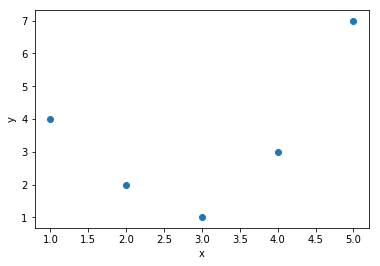

In [14]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x, y);

We can be stubborn and fit a line to the data using LinearRegression and get the optimal result:

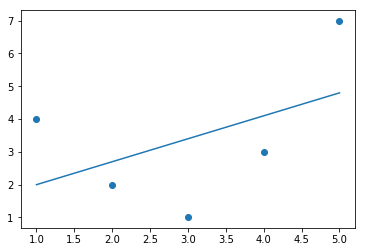

In [15]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

It's clear that we need a more sophisticated model to describe the relationship between $x$ and y.

One approach to this is to transform the data, adding extra columns of features to drive more flexibility in the model. For example, we can add polynomial features to the data this way:

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


The derived feature matrix has one column representing $x$, and a second column representing $x^2$, and a third column representing $x^3$. Computing a linear regression on this expanded input gives a much closer fit to our data:

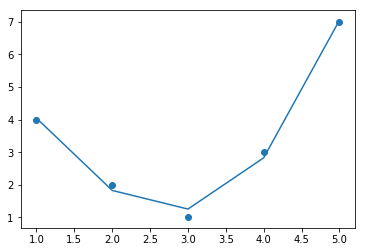

In [17]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

This idea of improving a model not by changing the model, but by transforming the inputs, is fundamental to many of the more powerful machine learning methods.

### Part 2: Simple linear regression with automobile data
We will now use sklearn to predict automobile milesage per gallon (mpg) and evaluate these predictions. We first load the data and split them into a training set and a testing set.

In [18]:
#load mtcars
dfcars=pd.read_csv("data/mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [19]:
#split into training set and testing set
from sklearn.model_selection import train_test_split
#set random_state to get the same split every time
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

In [20]:
#testing set is ~20% of the total data; training set is ~80%
dfcars.shape, traindf.shape, testdf.shape

((32, 12), (25, 12), (7, 12))

We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

>**EXERCISE:**  Pick one variable to use as a predictor for simple linear regression.  Create a markdown cell below and discuss your reasons.  You may want to justify this with some visualizations.  Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors?

In [21]:
# Your text here

> **EXERCISE:** With either sklearn or statsmodels, fit the training data using simple linear regression.  Use the model to make mpg predictions on testing set.  

> Plot the data and the prediction.  

>Print out the mean squared error for the training set and the testing set and compare.

In [22]:
#your code here
#define  predictor and response for training set


# define predictor and response for testing set


In [23]:
# Plot the data first, and separate it into training and test set

In [24]:
#your code here
# create linear regression object with sklearn


#your code here
# train the model and make predictions



#your code here
#print out coefficients


In [25]:
# Plot outputs for test set




In [26]:
# Plot outputs for training set



We can now estimate the mean square errors for the training and test set to see how well we fit the data with our model in each case.

In [27]:
# Your code here

We see that the training MSE is lower than the testing MSE.  This makes sense since we expect the model to be a better fit for the training data (since we trained with it!) than the testing data set.

### Part 3: Multiple linear regression with automobile data

> **EXERCISE:** With either sklearn or statsmodels, fit the training data using multiple linear regression with two predictors.  Use the model to make mpg predictions on testing set.  Print out the mean squared error for the training set and the testing set and compare.  

>How do these training and testing mean squared errors compare to those from the simple linear regression?

>Time permitting, repeat the training and testing with three predictors and calculate the mean squared errors.  How do these compare to the errors from the one and two predictor models?

In [28]:
#your code here


#create linear regression object with sklearn


#train the model 


#make predictions using the testing set


#coefficients


In [29]:
# Now with three predictors


#create linear regression object with sklearn


#train the model 


#make predictions using the testing set


#coefficients


We observe that both the training MSE and testing MSE are lower than the corresponding training and testing MSEs when we had one predictor.  So it seems that we'd prefer our model with two predictors than one predictor.  

But we observe that with the two predictor model the training MSE is larger than the testing MSE.  It is possible for the training MSE to be higher than the testing MSE.  This will be discussed more in lecture.  One possibility is that the test set was too small, so that the model by chance fit it better than the training set.  Can you think of other reasons?

### Part 4:  $k$-nearest neighbors

Great, so we did a simple linear regression on the car data.

Because we're good data scientists, we decide that a $k$ nearest-neighbor regression should also be performed.

Now that you're familiar with the `sklearn` API, you're ready to do a KNN regression.  We can go a little quicker here.  Let's use $5$ nearest neighbors.

In [33]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors=5)
knnreg.fit(x_train, y_train)
r2 = knnreg.score(x_test, y_test)
r2

*The $R^2$ error*

This is a good moment to define the $R^2$ score. This score is the proportion of the variance in the dependent variable that is predictable from the independent variable. Intuitively, it gives a measurement of how far the measured values $y_i$ are from the predicted values $f(x_i)$. 

If $\bar{y}$ is the mean of the $n$ observed values:

$$
\bar{y} = \frac{1}{n}\sum_{i=1}^{n} y_i
$$

then the variability of the data is given by the three sum of squares formulas:


* The total sum of squares:
$$
SS_{\rm{tot}} = \sum_i(y_i - \bar{y})^2
$$

* The regression sum of squares:
$$
SS_{\rm{reg}} = \sum_i(f_i - \bar{y})^2
$$

* The residual sum of squares:
$$
SS_{\rm{res}} = \sum_i(y_i - f_i)^2
$$

The $R^2$ score is generally defined as:

$$
R^2 \equiv 1 - \frac{\color{blue}{SS_{\rm{res}}}}{\color{red}{SS_{\rm{tot}}}}
$$

This is better understood if we look at a figure (credit Wikipedia). The better the linear regression (on the right) fits the data in comparison to the simple average (on the left graph), the closer the value of $R^2$ is to 1:

![](figures/rsquared.png)


*Distance functions*

The knn algorithm predicts the output value of an unseen point $x_0$ by averaging the output values of the $k$ nearest points in the training set. In order to measure a "distance", a proper metric should be decided on. Some popular distance functions are:

* The euclidean distance

$$
D = \sqrt{ \sum_{i=1}^k(x_i-y_i)^2}
$$


* The Manhattan distance

$$
D = \sum_{i=1}^k|x_i-y_i|
$$

* The Minkowski distance

$$
D = \left( \sum_{i=1}^k(|x_i-y_i|)^q \right)^{1/q}
$$

In sklearn you can choose to use between these distances by changing the `p` parameter of the `KNeighborsRegressor` function.

You can also decide to give different weights to the different $k$ neighbors considered in a given prediction, which might be desirable in certain cases. Using the `weights` parameter in `KNeighborsRegressor` you can choose between different weighting strategies. For example, you might want to give more weight to those points that are closest to your prediction points. The parameter can take values `uniform` or `distance`.

<div class="exercise"><b>Exercise</b></div>
What is the $R^{2}$ score on the training set?

In [ ]:
knnreg.fit(x_train, y_train)
r2 = knnreg.score(x_train, y_train)
r2

Lets vary the number of neighbors and see what we get.

In [ ]:
regdict = {}
# Do a bunch of KNN regressions
for k in [1, 2, 4, 6, 8, 10, 15]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(x_train, y_train)
    print(knnreg.score(x_train, y_train)) # print the R2 score in each case.
    regdict[k] = knnreg # Store the regressors in a dictionary

In [ ]:
# Now let's plot it all
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(dfcars.wt, dfcars.mpg, 'o', label="data")

xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
for k in [1, 2, 6, 10, 15]:
    predictions = regdict[k].predict(xgrid.reshape(100,1))
    if k in [1, 6, 15]:
        ax.plot(xgrid, predictions, label="{}-NN".format(k))
    

ax.legend();

What happens if we change the distance fucntion?

In [ ]:
regdict = {}
# Do a bunch of KNN regressions
for k in [1, 2, 4, 6, 8, 10, 15]:
    knnreg = KNeighborsRegressor(n_neighbors=k,p=3)
    knnreg.fit(x_train, y_train)
    print(knnreg.score(x_train, y_train)) # print the R2 score in each case.
    regdict[k] = knnreg # Store the regressors in a dictionary

In [ ]:
# Now let's plot it all
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(dfcars.wt, dfcars.mpg, 'o', label="data")

xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
for k in [1, 2, 6, 10, 15]:
    predictions = regdict[k].predict(xgrid.reshape(100,1))
    if k in [1, 6, 15]:
        ax.plot(xgrid, predictions, label="{}-NN".format(k))
    

ax.legend();

Let us now try a weighted knn regression, where the neighbors are weighted according to their distance, with the closest training points to the prediction points having more weight:

In [ ]:
regdict = {}
# Do a bunch of KNN regressions
for k in [1, 2, 4, 6, 8, 10, 15]:
    knnreg = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knnreg.fit(x_train, y_train)
    print(knnreg.score(x_train, y_train)) # print the R2 score in each case.
    regdict[k] = knnreg # Store the regressors in a dictionary

In [ ]:
# Now let's plot it all
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(dfcars.wt, dfcars.mpg, 'o', label="data")

xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
for k in [1, 2, 6, 10, 15]:
    predictions = regdict[k].predict(xgrid.reshape(100,1))
    if k in [1, 6, 15]:
        ax.plot(xgrid, predictions, label="{}-NN".format(k))
    

ax.legend();

Not that in the case of sparse data, the distance weighting schme tends to behave like the $k=1$ case, since the prediction depends strongly on the nearest training point in each case.

> **EXERCISE:** Now do knn regression for the case of two or more predictors. For each case, calculate the R2 score. Use different values of $k$, just like above. Try different distance and weigthing strategies. Ellaborate about your findings.

In [ ]:
# Your code here


### Bootstrap

We have discussed in the lecture the concept of bootstrapping, which consists on estimating the parameters of a population by using a single sample of that population, by taking bootstrap samplings from it (sampling with replacement) Here we demonstrate it with an example.

Let us first generate a synthetic dataset.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

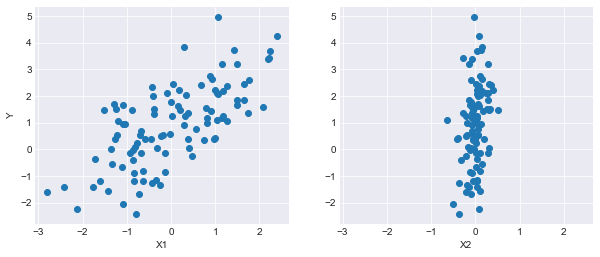

In [35]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

Assuming that we have certain errors associated with our measurements of $Y$, we will find a distribution of possible values for the parameters $\beta$ (slope) and $\alpha$ (intercept). We are not doing Bayesian regression yet, so let us assume that the distribution of slolutions looks like this for the first predictor:

In [60]:
np.random.seed(124)
slopes = np.random.normal(loc=1.0,scale=0.3,size=300)
intercepts = np.random.normal(loc=1,scale=0.3,size=300)

Text(0.5,0,'X1')

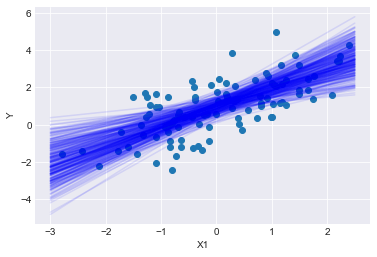

In [61]:
plt.scatter(X1, Y)
x0 = np.linspace(-3.0,2.5,100)
for i in range(len(slopes)):
    plt.plot(x0,x0*slopes[i]+intercepts[i],color='b',alpha=0.1)
plt.ylabel('Y'); plt.xlabel('X1')

As well as the distribution of, say, the slope parameter:

Text(0.5,0,'$\\beta ($Slope)')

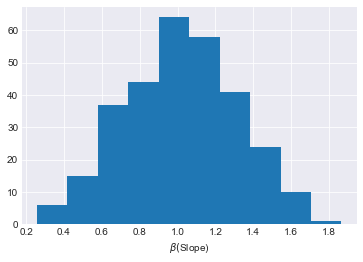

In [62]:
plt.hist(slopes)
plt.xlabel(r'$\beta ($Slope)')

Suppose you want to estimate the error on the mean value of the slope. In principle you would like to have the entire population of solutions, but you only have a set of 300 samples from that underlying population, that we have modeled to be normally distributed. With bootrstrap we an estimate the errors using this only sample we have.

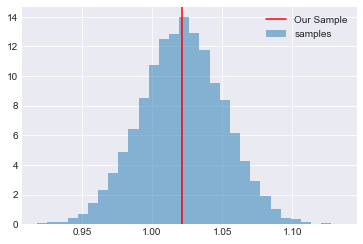

In [64]:
# Bootstrapping
M_samples=10000  # The number of bootstrap samples we want
N_points = 100  # The number of points we want to samples from the dist.

# Let's sample with replacement.
bs_np = np.random.choice(slopes, size=(M_samples, N_points), replace=True)

# Calculate the mean
sd_mean=np.mean(bs_np, axis=1)

# And the standard deviation
sd_std=np.std(bs_np, axis=1)

# Plot results
plt.hist(sd_mean, bins=30, normed=True, alpha=0.5,label="samples");
plt.axvline(slopes.mean(), 0, 1, color='r', label='Our Sample')
plt.legend()

<div class="exercise"><b>Exercise</b></div>
We have estimated the uncertainty for the mean of the slopes distribution. Can you do it also for the standard deviation? Can you perform a similar analysis for the interept of the fit?